# Imports

In [117]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Some helper functions

In [118]:
def calculate_reactive_pf(power_factor: float) -> float:
    """
    Calculate sin(theta) from power factor.

    Parameters
    ----------
    power_factor: float
        Power factor of the load

    Returns
    -------
    float
        sin(theta) of the load
    """
    return np.sin(np.arccos(power_factor))

# Per unit base values

In [119]:
s_base: float = 100e6  # base power in VA
v_base: float = 345e3  # base voltage in V
i_base: float = s_base / v_base  # base current in A
z_base: float = v_base ** 2 / s_base  # base impedance in ohms

# Create dataframe from the given CSV file

In [120]:
df: pd.DataFrame = pd.read_csv("question_1_inputs.csv", index_col=0)
df["Load_P"] = round(df["Load_S"] * df["Load_PF"], 3)
df["Load_Q"] = round(df["Load_S"] * calculate_reactive_pf(df["Load_PF"]))

In [121]:
Types: dict[str, str] = {
    "Slack": "Slack",
    "Darwin": "PV",
    "JCMB": "PQ",
    "William Rankin": "PV",
    "A G Bell": "PV",
    "Sanderson": "PV",
    "D Rutherford": "PQ",
}

# Calculate rectangular coordinates of the loads and generators

In [122]:
df.loc[df['Gen_S'].notna() & df['Gen_PF'].notna(), 'Gen_P'] = df['Gen_S'] * df['Gen_PF']
df.loc[df['Gen_S'].notna() & df['Gen_PF'].notna(), 'Gen_Q'] = df['Gen_S'] * df['Gen_PF'].apply(calculate_reactive_pf)

# 2. Compute Load_P and Load_Q where Load_S and Load_PF are not NaN
df.loc[df['Load_S'].notna() & df['Load_PF'].notna(), 'Load_P'] = df['Load_S'] * df['Load_PF']
df.loc[df['Load_S'].notna() & df['Load_PF'].notna(), 'Load_Q'] = df['Load_S'] * df['Load_PF'].apply(
    calculate_reactive_pf)

# 3. Map the Name column to the Type dictionary
df['Type'] = df['Type'].where(df['Type'].notna(), df.index.map(Types))

# Get the list of columns in its current order
cols: list[str | float] = df.columns.tolist()

# Find the index of the column AFTER where you want to insert Gen_Q
insert_index: int = cols.index('Gen_P') + 1  # Insert after Gen_PF. Change 'Gen_PF' if needed.

# Remove Gen_Q from its current position
cols.remove('Gen_Q')

# Insert Gen_Q at the desired position
cols.insert(insert_index, 'Gen_Q')

# Reorder the DataFrame columns
df: pd.DataFrame = df[cols]

df: pd.DataFrame = df.round(5)

df

,Voltage,Type,Gen_S,Gen_P,Gen_Q,Gen_V,Gen_PF,Load_S,Load_PF,Load_P,Load_Q
Name,,,,,,,,,,,
Slack,345.0,Slack,NaN,NaN,NaN,1.0+0.0j,NaN,NaN,NaN,NaN,NaN
Swann,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JCMB,13.8,PQ,125.0,100.0,75.0,NaN,0.8,100.0,0.800,80.000,60.00000
Alrick,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
William Rankin,115.0,PV,NaN,NaN,NaN,NaN,NaN,150.0,0.900,135.000,65.38348
Fleeming Jenkin,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A G Bell,115.0,PV,NaN,NaN,NaN,NaN,NaN,35.0,0.857,29.995,18.03607
Faraday,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sanderson,13.8,PV,NaN,200.0,NaN,1.0,NaN,120.0,0.833,99.960,66.39276


# Present data in a tabular format

In [123]:
headers_gen_loads: list[str] = [
    f"{"Bus Number":>^10}",
    f"{"Bus Name":^15}",
    f"{"Voltage":^15}",
    f"{"Gen_S (MVA)":^15}",
    f"{"Gen_P (MW)":^15}",
    f"{"Gen_Q(MVAr)":^15}",
    f"{"Load_P(MW)":^15}",
    f"{"Load_Q(MVAr)":^15}",
]
table_gen_loads: list[list[str]] = []
i = 0
for index, row in df.iterrows():
    i += 1
    table_gen_loads.append(
        [
            i,
            index,
            f"{row["Voltage"]:^15.5f}",
            f"{row["Gen_S"]:^15.5f}",
            f"{row["Gen_P"]:^15.5f}",
            f"{row["Gen_Q"]:15.5f}",
            f"{row["Load_P"]:^15.5f}",
            f"{row["Load_Q"]:^15.5f}",
        ]
    )

print(tabulate(table_gen_loads, headers=headers_gen_loads, tablefmt="pipe", numalign="center", stralign="center"))

|  Bus Number  |     Bus Name      |      Voltage      |    Gen_S (MVA)    |    Gen_P (MW)     |    Gen_Q(MVAr)    |    Load_P(MW)     |   Load_Q(MVAr)    |
|:------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
|      1       |       Slack       |        345        |        nan        |        nan        |        nan        |        nan        |        nan        |
|      2       |       Swann       |        230        |        nan        |        nan        |        nan        |        nan        |        nan        |
|      3       |       JCMB        |       13.8        |     125.00000     |     100.00000     |     75.00000      |     80.00000      |     60.00000      |
|      4       |      Alrick       |        230        |        nan        |        nan        |        nan        |        nan        |        nan        |
|      5       |  William Rankin   |        115        |  

# Present the transformer data in a tabular format

In [124]:
t_dict: dict[str, list[int | float]] = {
    "from": [1, 3, 5, 7, 9, 11, 2, ],
    "to": [2, 4, 6, 8, 10, 12, 13, ],
    "rating": [200, 100, 120, 120, 200, 100, 100, ],
    "r": [0.7, 0.385, 0.2, 0.2, 0.7, 0.385, 0.5, ],
    "x": [7, 3.85, 5, 5, 7, 3.85, 5, ],
}

header_transformer: list[str] = [f"{"From":^5}", f"{"To":^5}", f"{"Rating(MVA)":^15}", f"{"Z (pu)":^15}"]
table_transformer: list[list[str]] = []

for i in range(len(t_dict["from"])):
    rating = t_dict["rating"][i] * 10 ** 6
    r = t_dict["r"][i]
    x = t_dict["x"][i]
    z = r / 100 + 1j * x / 100
    z_new = z * s_base / rating
    r_new, x_new = z_new.real, z_new.imag
    r_sign = "+" if r_new >= 0 else "-"
    x_sign = "+" if x_new >= 0 else "-"
    table_transformer.append(
        [
            f"{t_dict["from"][i]:^5}",
            f"{t_dict["to"][i]:^5}",
            f"{t_dict["rating"][i]:^15}",
            f"{r_sign:^1} {abs(r_new):^5.5f} {x_sign:^1} {abs(x_new):^5.5f}"
        ]
    )

print(tabulate(table_transformer, headers=header_transformer, tablefmt="pipe", numalign="center", stralign="center"))

|  From   |   To    |    Rating(MVA)    |       Z (pu)        |
|:-------:|:-------:|:-----------------:|:-------------------:|
|    1    |    2    |        200        | + 0.00350 + 0.03500 |
|    3    |    4    |        100        | + 0.00385 + 0.03850 |
|    5    |    6    |        120        | + 0.00167 + 0.04167 |
|    7    |    8    |        120        | + 0.00167 + 0.04167 |
|    9    |   10    |        200        | + 0.00350 + 0.03500 |
|   11    |   12    |        100        | + 0.00385 + 0.03850 |
|    2    |   13    |        100        | + 0.00500 + 0.05000 |


# Plotting for Question 4.5

In [125]:
voltage_mag_4_5: list[float] = [0.963, 0.917, 0.860, 0.782, 0.645, 0.513, 0.428, 0.370]
voltage_ang_4_5: list[float] = [-3.536, -7.231, -11.484, -16.913, -25.238, -32.582, -36.989, -39.909]
active_power_4_5: list[float] = []
reactive_power_4_5: list[float] = []
i = 1
p = 70.0
q = 38.730
while q <= 310:
    print(f"{i:>2.0f} | {p:>7.3f} | {q:>7.3f}")
    active_power_4_5.append(round(p, 3))
    reactive_power_4_5.append(round(q, 3))
    p += 70.0
    q += 38.7
    i += 1

 1 |  70.000 |  38.730
 2 | 140.000 |  77.430
 3 | 210.000 | 116.130
 4 | 280.000 | 154.830
 5 | 350.000 | 193.530
 6 | 420.000 | 232.230
 7 | 490.000 | 270.930
 8 | 560.000 | 309.630


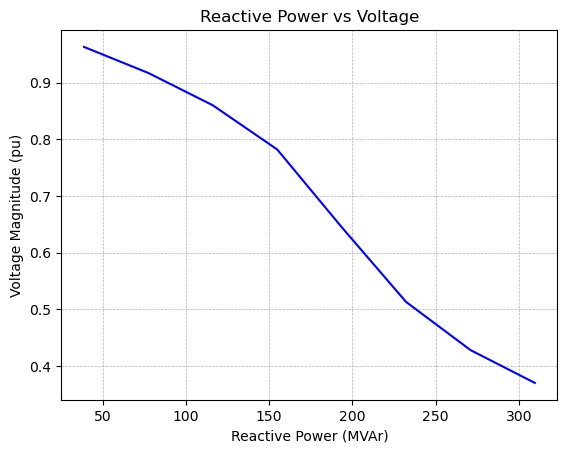

In [126]:
fig, ax1 = plt.subplots()
ax1.plot(reactive_power_4_5, voltage_mag_4_5, color="blue")
ax1.set_xlabel("Reactive Power (MVAr)")
ax1.set_ylabel("Voltage Magnitude (pu)")
ax1.grid(axis="both", linestyle="--", linewidth=0.5)
plt.title("Reactive Power vs Voltage")
plt.show()

# Plotting for Question 4.6

In [127]:
# Part 1
voltage_mag_4_6_1: list[float] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]
voltage_ang_4_6_1: list[float] = [2.126, -2.804, -7.818, -12.964, -18.307, -23.927, -29.945, -36.56, -44.154, -53.685,
                                  -72.807]
active_power_4_6_1: list[float] = []
reactive_power_4_6_1: list[float] = []

i = 1
p = 99.96
q = 66.393
while p <= 600:
    print(f"{i:>2.0f} | {p:>8.3f} | {q:>8.3f}")
    active_power_4_6_1.append(round(p, 3))
    reactive_power_4_6_1.append(round(q, 3))
    p += 50.0
    q += 33.0
    i += 1


 1 |   99.960 |   66.393
 2 |  149.960 |   99.393
 3 |  199.960 |  132.393
 4 |  249.960 |  165.393
 5 |  299.960 |  198.393
 6 |  349.960 |  231.393
 7 |  399.960 |  264.393
 8 |  449.960 |  297.393
 9 |  499.960 |  330.393
10 |  549.960 |  363.393
11 |  599.960 |  396.393


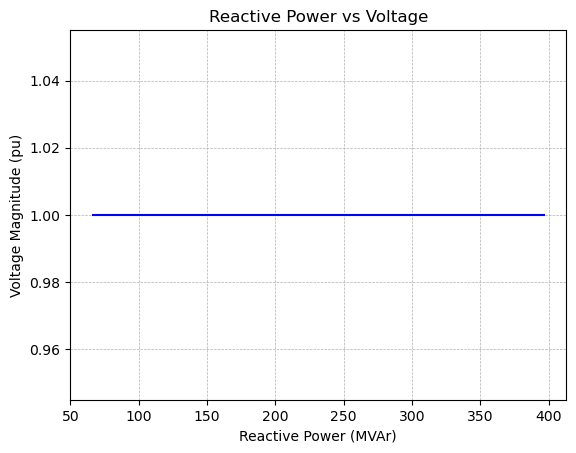

In [128]:
fig, ax1 = plt.subplots()
ax1.plot(reactive_power_4_6_1, voltage_mag_4_6_1, color="blue")
ax1.set_xlabel("Reactive Power (MVAr)")
ax1.set_ylabel("Voltage Magnitude (pu)")
ax1.grid(axis="both", linestyle="--", linewidth=0.5)
plt.title("Reactive Power vs Voltage")
plt.show()

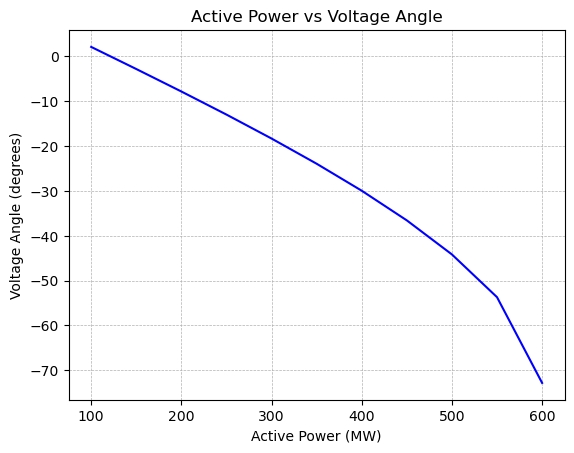

In [129]:
fig, ax1 = plt.subplots()
ax1.plot(active_power_4_6_1, voltage_ang_4_6_1, color="blue")
ax1.set_xlabel("Active Power (MW)")
ax1.set_ylabel("Voltage Angle (degrees)")
ax1.grid(axis="both", linestyle="--", linewidth=0.5)
plt.title("Active Power vs Voltage Angle")
plt.show()

In [139]:
# Part 2
voltage_mag_4_6_2: list[float] = [1.000, 0.997, 0.916, 0.801, 0.612, 0.520, 0.463]
voltage_ang_4_6_2: list[float] = [2.126, -2.775, -7.524, -13.744, -22.821, -26.968, -29.446]
active_power_4_6_2: list[float] = []
reactive_power_4_6_2: list[float] = []

i = 1
p = 99.96
q = 66.393
while p <= 600:
    print(f"{i:>2.0f} | {p:>8.3f} | {q:>8.3f}")
    active_power_4_6_2.append(round(p, 3))
    reactive_power_4_6_2.append(round(q, 3))
    p += 50.0
    q += 33.0
    i += 1

del reactive_power_4_6_2[7:11]
del active_power_4_6_2[7:11]



 1 |   99.960 |   66.393
 2 |  149.960 |   99.393
 3 |  199.960 |  132.393
 4 |  249.960 |  165.393
 5 |  299.960 |  198.393
 6 |  349.960 |  231.393
 7 |  399.960 |  264.393
 8 |  449.960 |  297.393
 9 |  499.960 |  330.393
10 |  549.960 |  363.393
11 |  599.960 |  396.393


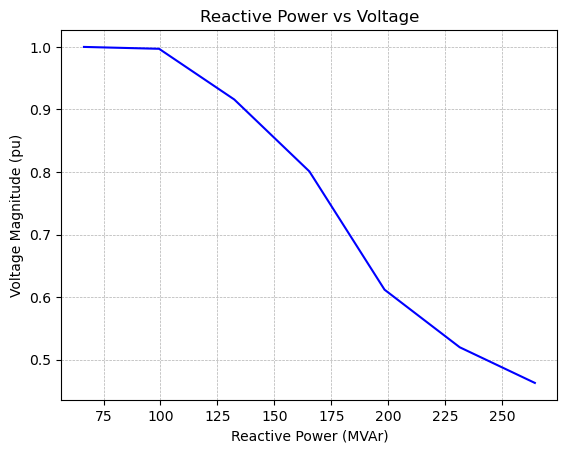

In [140]:
fig, ax1 = plt.subplots()
ax1.plot(reactive_power_4_6_2, voltage_mag_4_6_2, color="blue")
ax1.set_xlabel("Reactive Power (MVAr)")
ax1.set_ylabel("Voltage Magnitude (pu)")
ax1.grid(axis="both", linestyle="--", linewidth=0.5)
plt.title("Reactive Power vs Voltage")
plt.show()

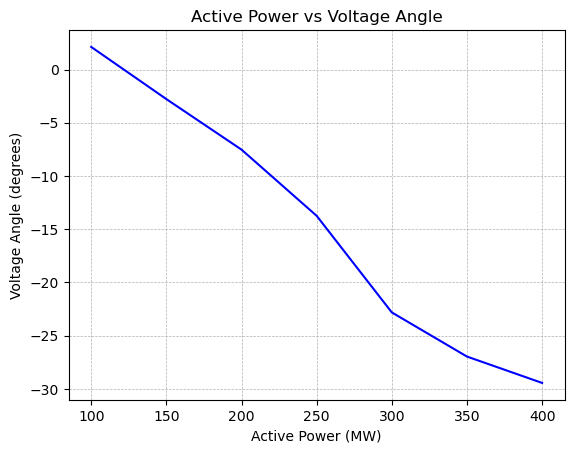

In [141]:
lt.show()
fig, ax1 = plt.subplots()
ax1.plot(active_power_4_6_2, voltage_ang_4_6_2, color="blue")
ax1.set_xlabel("Active Power (MW)")
ax1.set_ylabel("Voltage Angle (degrees)")
ax1.grid(axis="both", linestyle="--", linewidth=0.5)
plt.title("Active Power vs Voltage Angle")
plt.show()